# Graded Challenge 1 #

Yudha Cipta M. Y. _(Hacktiv8 FTDS Batch -01)_
***

Pada project kali ini akan dilakukan analisa data sederhana dan menentukan pencarian data pokemon terkuat dari pokemon dengan kategori legendary serta non-legendary. data yang tersedia terdapat dalam url _kaggel:https://www.kaggle.com/abcsds/pokemon_ yang telah diunduh dalam file `Pokemon.csv` 

pustaka/library yang digunakan yaitu `pandas` untuk melakukan data processing dan `matplotlib & seaborn` untuk visualisasi
***

In [189]:
#Import pustaka yang dibutuhkan
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Data Loading 
***
loading data dari data yang tersedia _(`pokemon.csv`)_ dan dilanjutkan dengan _eksplorasi data_ secara sederhana

In [173]:
#buat dataframe dari file csv yang bernama df
df = pd.read_csv('Pokemon.csv')

#mengecek datad dari bagian teratas
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


data telah terload dengan baik, 
dalam file `Pokemon.csv` terdapat beberapa variabel:

Header | Definition
---|---
`#` | ID for each pokemon
`Name` | Name of each pokemon
`Type 1` |  Each pokemon has a type, this determines weakness/resistance to attacks
`Type 2` | Second type of pokemon, some pokemon are dual type _only if dual type_
`Total` | sum of all stats that come after this, a general guide to how strong a pokemon is
`HP` | hit points, or health, defines how much damage a pokemon can withstand before fainting
`Attack` | the base modifier for normal attacks (eg. Scratch, Punch)
`Defense` | the base damage resistance against normal attacks
`SP Atk` | special attack, the base modifier for special attacks (e.g. fire blast, bubble beam)
`SP Def` | the base damage resistance against special attacks
`Speed` | determines which pokemon attacks first each round


In [174]:
#mencari shape dari dataset
df.shape

(800, 13)

In [175]:
#melihat data type secara keseluruhan dan jumlah data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
#             800 non-null int64
Name          800 non-null object
Type 1        800 non-null object
Type 2        414 non-null object
Total         800 non-null int64
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Sp. Atk       800 non-null int64
Sp. Def       800 non-null int64
Speed         800 non-null int64
Generation    800 non-null int64
Legendary     800 non-null bool
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [176]:
#melihat data statistik dari dataset
df.describe() 

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000



output dalam df.info() menunjukkan hasil non-null pada data yang diimport, namun dilakukan pengecekan lebih lanjut untuk mencari missing value
***

#### Data Cleaning ####
mengecek data _missing value_ dalam dataset dan memanipulasi data tersebut sebelum melakukan _eksplorasi data_ lebih lanjut

In [177]:
#cek jika ada missing value dalam dataset
df.isnull().values.any()

True

In [178]:
df.isnull().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

terdapat _missing value_ yang harus diperbaiki dahulu dalam kategori `Type 2` . <br>
kita dapat menghapus semua _missing value_ dalam kategori tersebut dengan menggunakan `df.dropna(inplace=True) and df.isnull().sum()` <br>
namun untuk menghindari kerusakan data maka dilakukan perubahan nama yang sama jika pokemon hanya memiliki 1 tipe saja.

In [179]:
#ganti value pokemon dengan satu type dengan nama yang sama dengan type 1

df["Type 2"] = df["Type 2"].fillna(value = df["Type 1"])
df.head(5)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,Fire,309,39,52,43,60,50,65,1,False


mengubah masing-masing semua huruf dalam kolom header menjadi uppercase, menghilangkan _blank space_ menjadi '_ ' dan menghapus kolom '#'

In [180]:
df.columns = df.columns.str.upper().str.replace('_', '')
df.columns =[column.replace(" ", "_") for column in df.columns]
del df["#"]
df.head(1)

,NAME,TYPE_1,TYPE_2,TOTAL,HP,ATTACK,DEFENSE,SP._ATK,SP._DEF,SPEED,GENERATION,LEGENDARY
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False


menghapus nama ganda dalam pokemon mega dan primal

In [181]:
df.set_index('NAME',inplace=True)
df.index = df.index.str.replace(".*(?=Mega)", "")
df.index = df.index.str.replace(".*(?=Primal)", "")
df.tail()

,TYPE_1,TYPE_2,TOTAL,HP,ATTACK,DEFENSE,SP._ATK,SP._DEF,SPEED,GENERATION,LEGENDARY
NAME,,,,,,,,,,,
Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
Mega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True
Volcanion,Fire,Water,600,80,110,120,130,90,70,6,True


***
#### Explorasi Data ####
_explorasi data_ lebih lanjut pada dataset seperti query, grouping dan visualisasi

In [183]:
#memecah pokemon tiap generasi dengan command .unique
gen=[[] for i in df.GENERATION.unique()]
for i in df.GENERATION.unique():
   gen[i-1].append(df[df["GENERATION"]==i])
gen

[[                TYPE_1    TYPE_2  TOTAL   HP  ATTACK  DEFENSE  SP._ATK  \
  NAME                                                                     
  Bulbasaur        Grass    Poison    318   45      49       49       65   
  Ivysaur          Grass    Poison    405   60      62       63       80   
  Venusaur         Grass    Poison    525   80      82       83      100   
  Mega Venusaur    Grass    Poison    625   80     100      123      122   
  Charmander        Fire      Fire    309   39      52       43       60   
  ...                ...       ...    ...  ...     ...      ...      ...   
  Dragonite       Dragon    Flying    600   91     134       95      100   
  Mewtwo         Psychic   Psychic    680  106     110       90      154   
  Mega Mewtwo X  Psychic  Fighting    780  106     190      100      154   
  Mega Mewtwo Y  Psychic   Psychic    780  106     150       70      194   
  Mew            Psychic   Psychic    600  100     100      100      100   
  
         

In [270]:
poke_legend = df.loc[df['LEGENDARY'] == True]
poke_legend.count() #jumlah pokemon legendary

TYPE_1        65
TYPE_2        65
TOTAL         65
HP            65
ATTACK        65
DEFENSE       65
SP._ATK       65
SP._DEF       65
SPEED         65
GENERATION    65
LEGENDARY     65
dtype: int64

memunculkan grafik bar plot untuk membandingkan tipe 1 dan 2

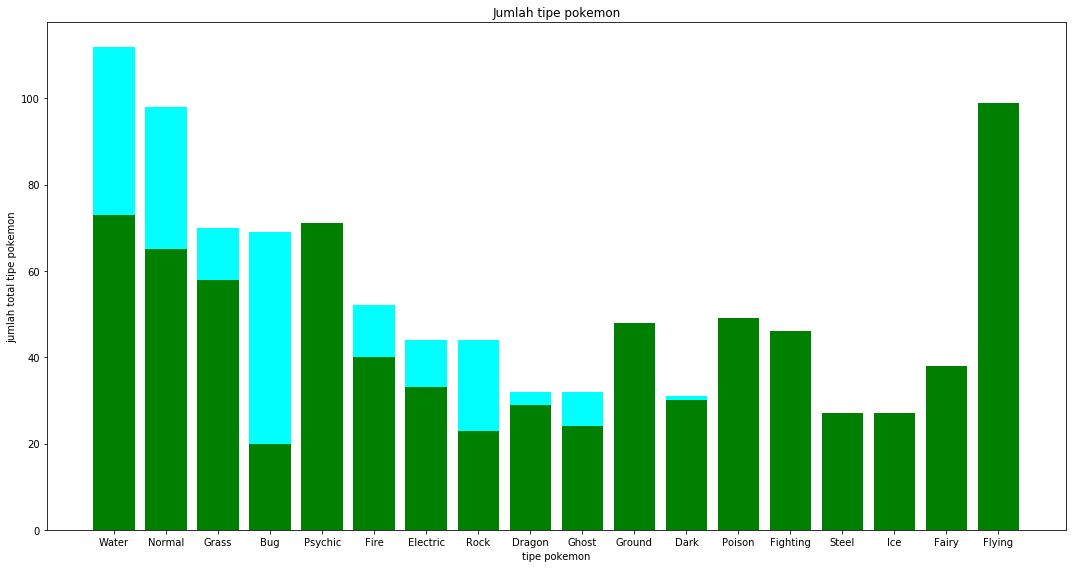

In [225]:
def bandingtipe1_2():
    tipe1 = df['TYPE_1'].value_counts()
    tipe2 = df['TYPE_2'].value_counts()
    fig,ax = plt.subplots(figsize=(15,8))
    ax.bar(tipe1.index,tipe1.values,color='cyan')
    ax.bar(tipe2.index,tipe2.values,color='green')
    ax.set_xlabel('tipe pokemon')
    ax.set_ylabel('jumlah total tipe pokemon')
    ax.set_title('Jumlah tipe pokemon')
    plt.tight_layout()
bandingtipe1_2()

melihat _legendary pokemon_ (TRUE) tiap generasi dan perbandingan dengan _nonlegendarynya_

Jumlah Legendary Pokemon untuk gen 1: 6
Jumlah Legendary Pokemon untuk gen 2: 5
Jumlah Legendary Pokemon untuk gen 3: 18
Jumlah Legendary Pokemon untuk gen 4: 13
Jumlah Legendary Pokemon untuk gen 5: 15
Jumlah Legendary Pokemon untuk gen 6: 8


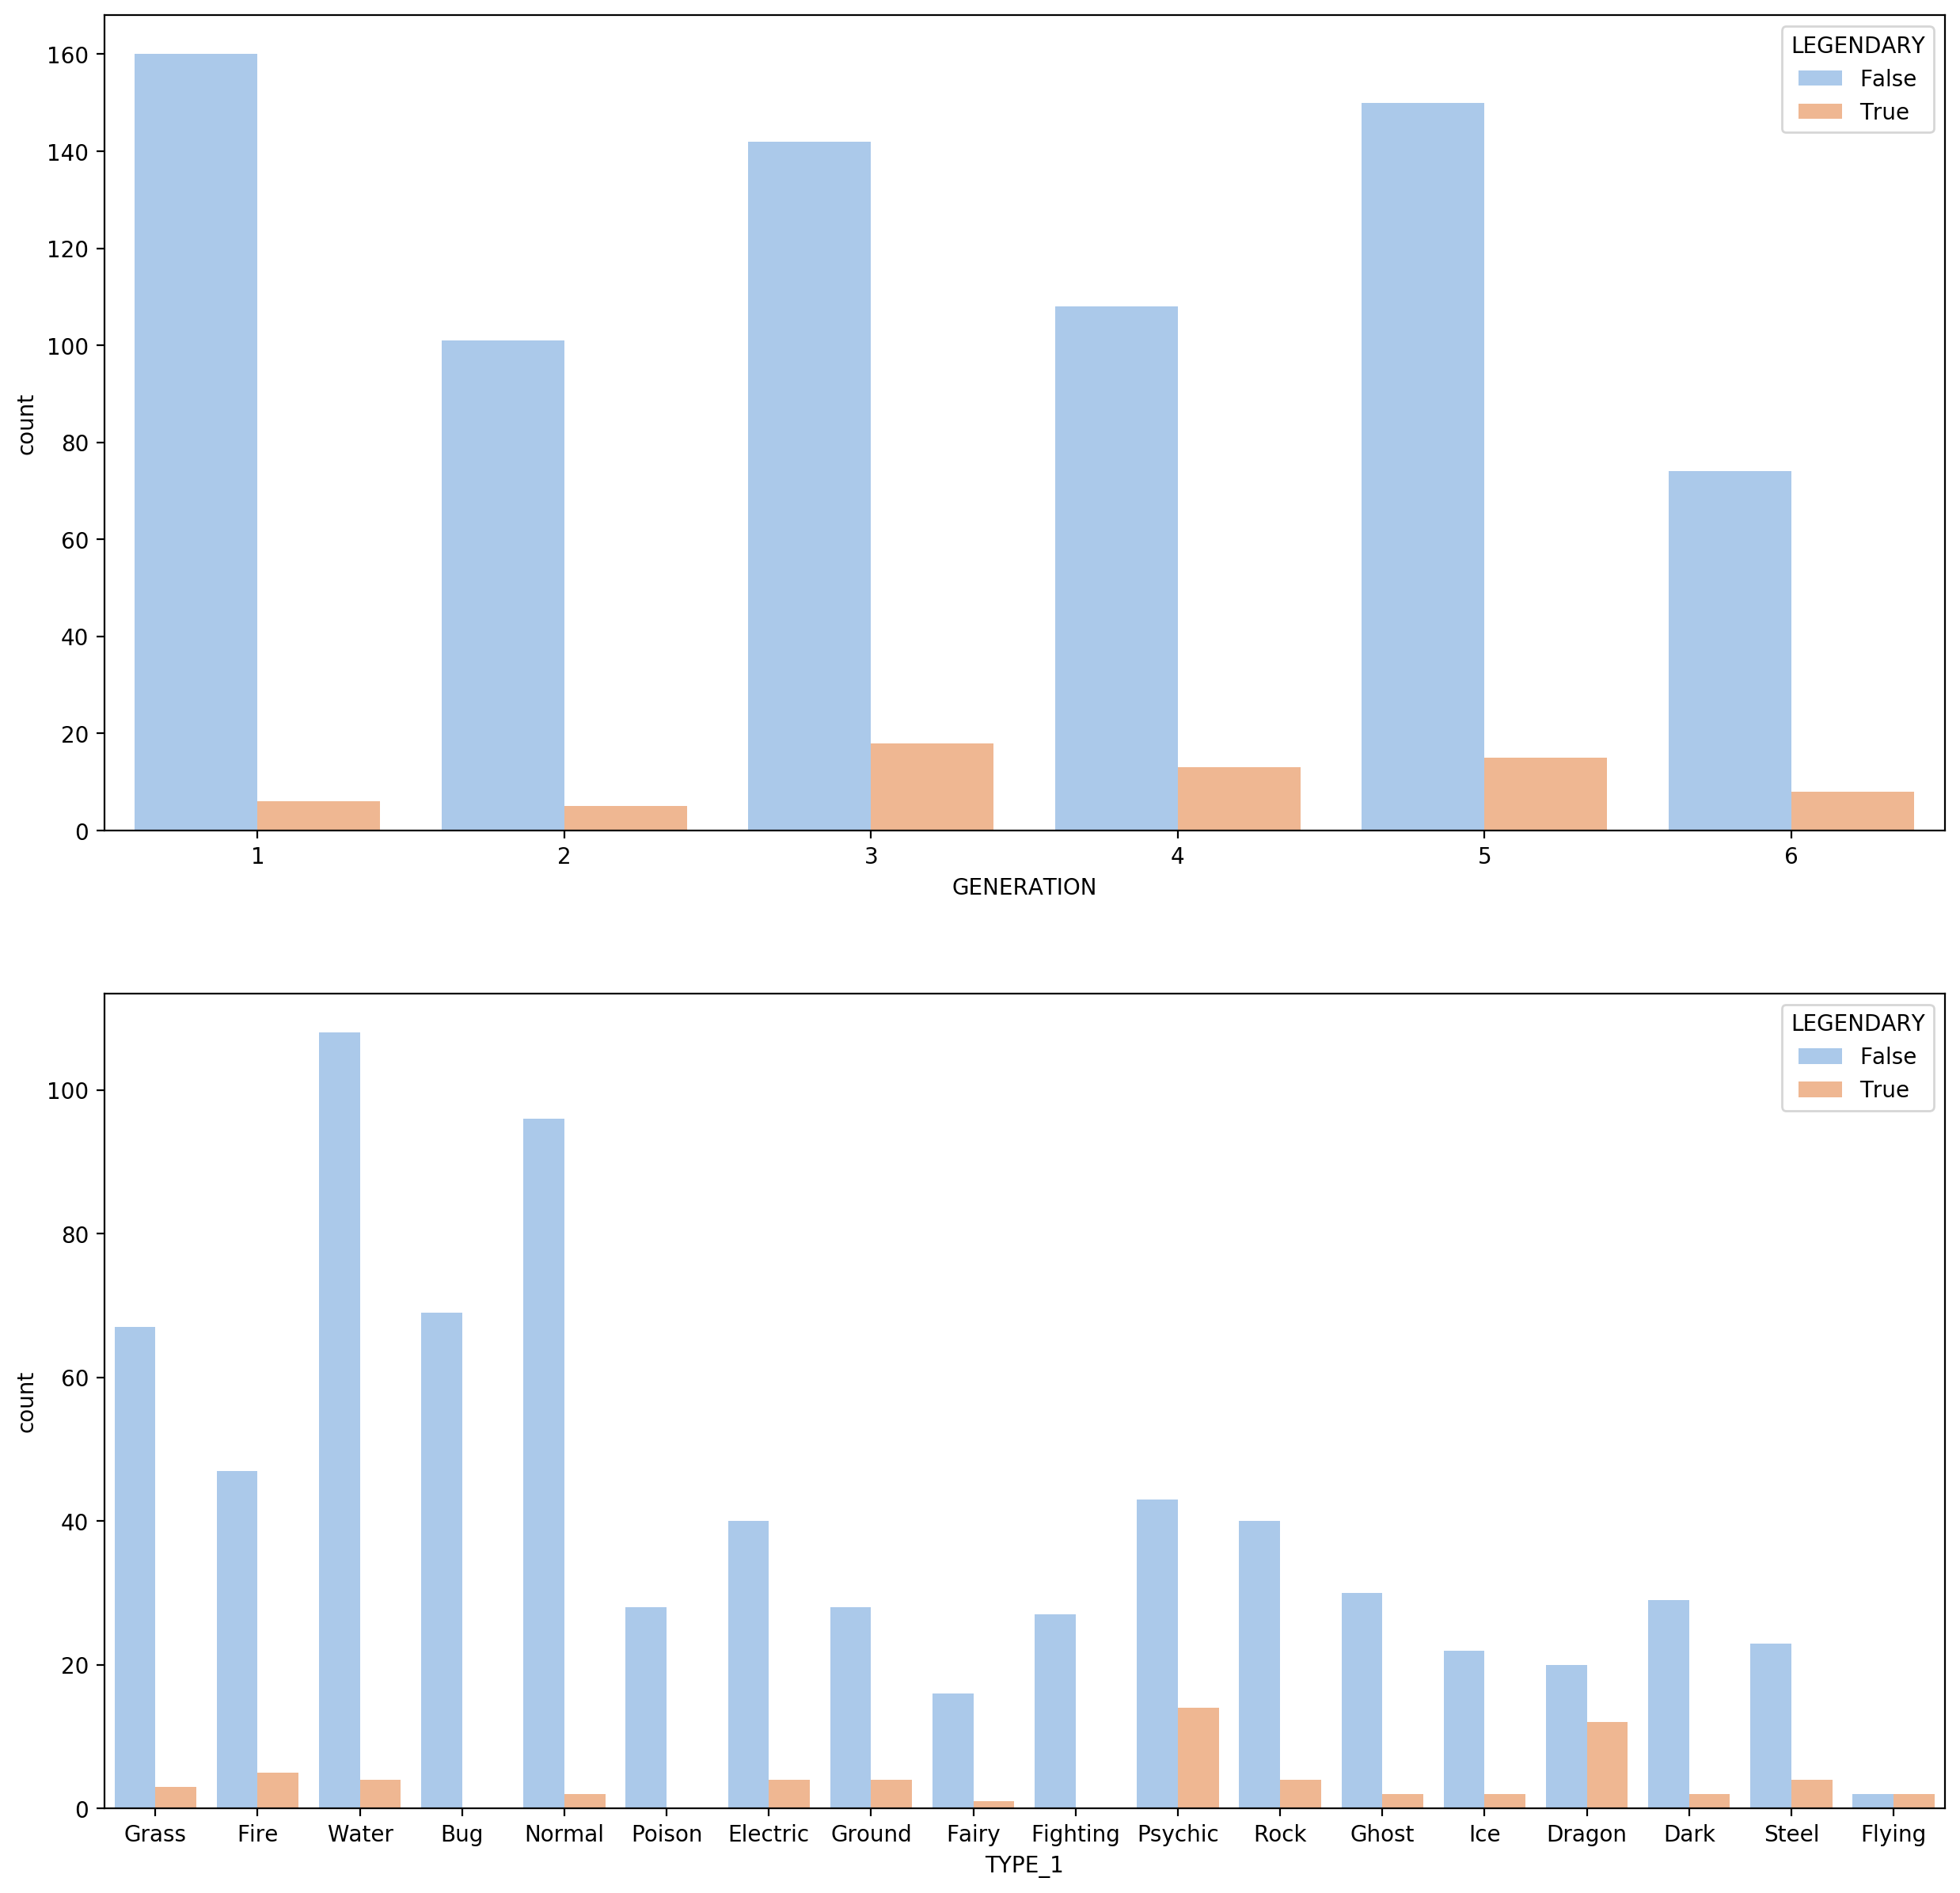

In [266]:
def pokemon_legend ():
    print('Jumlah Legendary Pokemon untuk gen 1:',df[(df['LEGENDARY']==True)&(df['GENERATION']==1)]['TYPE_1'].count()) 
    print('Jumlah Legendary Pokemon untuk gen 2:',df[(df['LEGENDARY']==True)&(df['GENERATION']==2)]['TYPE_1'].count())
    print('Jumlah Legendary Pokemon untuk gen 3:',df[(df['LEGENDARY']==True)&(df['GENERATION']==3)]['TYPE_1'].count())
    print('Jumlah Legendary Pokemon untuk gen 4:',df[(df['LEGENDARY']==True)&(df['GENERATION']==4)]['TYPE_1'].count())
    print('Jumlah Legendary Pokemon untuk gen 5:',df[(df['LEGENDARY']==True)&(df['GENERATION']==5)]['TYPE_1'].count())
    print('Jumlah Legendary Pokemon untuk gen 6:',df[(df['LEGENDARY']==True)&(df['GENERATION']==6)]['TYPE_1'].count())

    fig,ax = plt.subplots(2,figsize=(15,15),dpi=200)
    sns.set_palette("pastel")
    sns.countplot(data=df,x='GENERATION', hue='LEGENDARY',ax=ax[0])
    sns.countplot(data=df,x='TYPE_1',hue='LEGENDARY',ax=ax[1] )

pokemon_legend()


##### legend vs non-legend

***
melihat pokemon terkuat untuk kategori legendary dan non-legendary

In [188]:
#sortir pokemon terkuat
df.sort_values(['TOTAL'], ascending=False).head()

,TYPE_1,TYPE_2,TOTAL,HP,ATTACK,DEFENSE,SP._ATK,SP._DEF,SPEED,GENERATION,LEGENDARY
NAME,,,,,,,,,,,
Mega Rayquaza,Dragon,Flying,780,105,180,100,180,100,115,3,True
Mega Mewtwo Y,Psychic,Psychic,780,106,150,70,194,120,140,1,True
Mega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
Primal Kyogre,Water,Water,770,100,150,90,180,160,90,3,True
Primal Groudon,Ground,Fire,770,100,180,160,150,90,90,3,True


tentu saja legendary pokemon akan jauh lebih kuat dibandingkan pokemon non legendary, tapi jika dibandingkan dengan pokemon non legendary maka yang paling terkuat _top 3_ yaitu dapat dilihat dalam tabel selanjutnya

In [196]:
#mengambil data pokemon legendary saja (jika legendary saja maka ganti ! dengan =)
poke_nonlegend = df.loc[df['LEGENDARY'] != True]
poke_nonlegend.sort_values(['TOTAL'], ascending=False)

,TYPE_1,TYPE_2,TOTAL,HP,ATTACK,DEFENSE,SP._ATK,SP._DEF,SPEED,GENERATION,LEGENDARY
NAME,,,,,,,,,,,
Mega Metagross,Steel,Psychic,700,80,145,150,105,110,110,3,False
Mega Garchomp,Dragon,Ground,700,108,170,115,120,95,92,4,False
Mega Salamence,Dragon,Flying,700,95,145,130,120,90,120,3,False
Mega Tyranitar,Rock,Dark,700,100,164,150,95,120,71,2,False
Slaking,Normal,Normal,670,150,160,100,95,65,100,3,False
...,...,...,...,...,...,...,...,...,...,...,...
Caterpie,Bug,Bug,195,45,30,35,20,20,45,1,False
Wurmple,Bug,Bug,195,45,45,35,20,30,20,3,False
Kricketot,Bug,Bug,194,37,25,41,25,41,25,4,False


untuk melihat deskripsi pokemon non legendary secara rata-rata juga dapat dilihat pada tabel dibawah dan dapat menjadi acuan tipe mana yang disarankan dicari

In [199]:
status_nonlegendary = poke_nonlegend.groupby(['TYPE_1'])['TOTAL'].describe()
status_nonlegendary.sort_values('max', ascending=False) 

,count,mean,std,min,25%,50%,75%,max
TYPE_1,,,,,,,,
Dragon,20.0,476.850000,134.362148,300.0,387.50,468.5,600.00,700.0
Steel,23.0,466.434783,110.647198,300.0,400.00,470.0,520.00,700.0
Rock,40.0,437.625000,98.422868,280.0,355.00,425.0,500.00,700.0
Normal,96.0,395.572917,108.692104,190.0,297.50,414.0,479.25,670.0
Water,108.0,421.398148,103.937341,200.0,325.00,435.0,500.00,640.0
Fire,47.0,442.127660,102.490215,250.0,357.50,460.0,529.00,634.0
Grass,67.0,413.432836,102.368352,180.0,318.00,413.0,490.00,630.0
Fighting,27.0,416.444444,102.464378,210.0,326.50,455.0,497.50,625.0
Psychic,43.0,423.000000,112.039534,198.0,324.00,425.0,490.00,618.0


***
#### Kesimpulan ###


* Pokemon _Legendary_ lebih kuat dibandingkan dengan _common_ pokemon atau pokemon _non-legendary_ dengan _stat_ diatas rata-rata.
* top 3 pokemon _legendary_ terkuat berdasarkan _stat_ keseluruhan yaitu mega rayquaza, mega mewtwo x dan mega mewtwo y.
* untuk pokemon _non-legendary_ yang terkuat adalah mega metagross, mega garchomp dan mega salamence, namun untuk pemilihan diawal disarankan untuk memilih tipe _Dragon_ karena memiliki _stat_ rata-rata yang bagus.